# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
##Identify key drivers for used car prices
##Create a predictive model to discern the factors influencing used car prices using the vehicle.csv dataset. 
##This dataset encompasses diverse car characteristics including year, mileage, manufacturer, model, condition, and location.
##The project entails conducting exploratory data analysis to uncover relationships between these attributes and price,
##preprocessing to manage missing data and categorical variables, and applying regression methods to measure each variable's influence on used car prices.
##The goal is to give recommendations to a used car dealership on consumer preferences and what aspects drive perceived value in the used car market.


In [1]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
##Vehicles.csv dataset is provided from Kaggle
dataset = pd.read_csv('data/vehicles.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
##In this dataset 
##  Dependent Variable is the Price of the car
##  Independent Variables are Key Drivers i.e columns used to train and test the model
## Business probelm :
## Predict the price of used cars based on various attributes provided in the dataset, by understanding how key drivers can influence 
## the pricing of used cars in different regions and under different conditions.


In [ ]:
##Key Drivers of the data set by observation manufacturere, condition, cylinders, transmission, type, paint_color, state, year
## Technical Approach
##To address the business problem, a regression analysis could be employed where the dependent variable is the price of the used car, and the independent variables include those identified as key drivers.
##Techniques such as multiple linear regression and be used depending on the complexity and size of the dataset.
##Feature engineering : handling missing data, encoding categorical variables, and possibly scaling numerical features
## finally build a model build a model that accurately predicts the price of a used car given its characteristics, which can help sellers optimize pricing strategies and buyers make informed decisions


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
dataset.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
##Find out cardinality of each column in the dataset
# Calculate cardinality (number of unique values) for each column
cardinality = dataset.nunique()
# Print or display the results
print("Cardinality of each column:")
print(cardinality)


Cardinality of each column:
id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


Figure saved as: images/attribute_histogram_plots.png


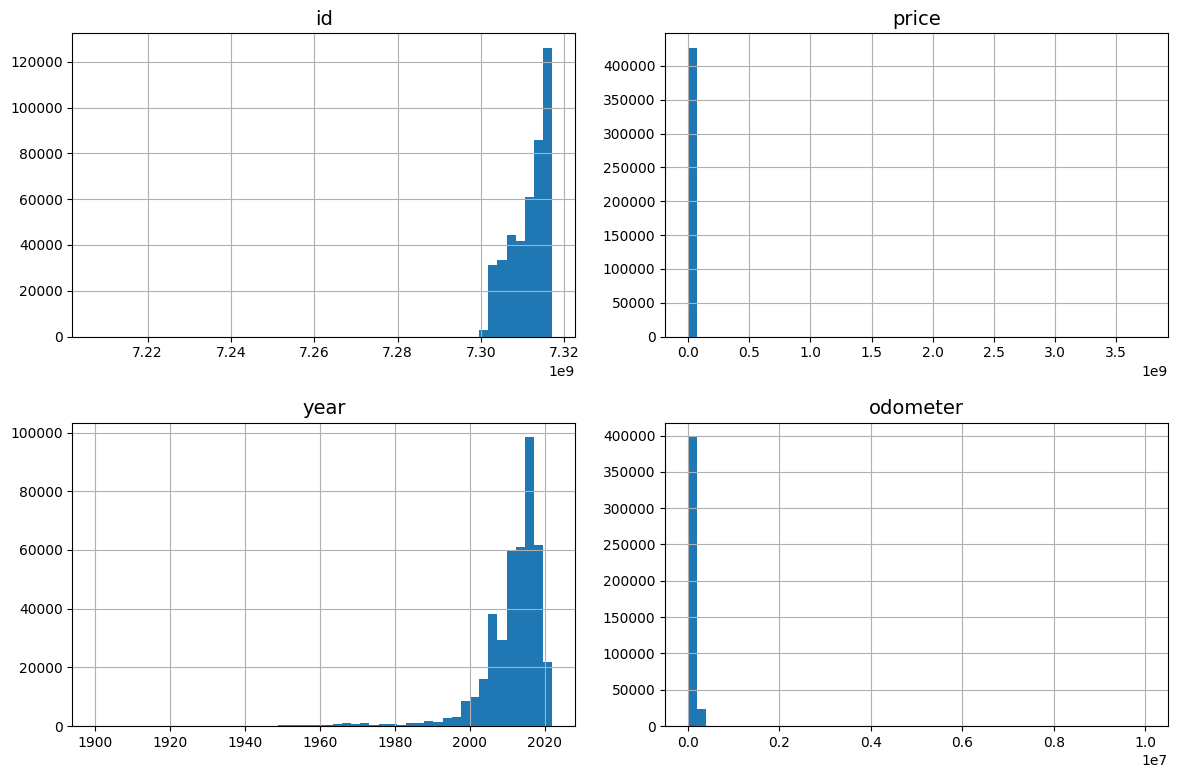

In [6]:

# Function to save figures as high-res PNGs
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create a folder 'images' if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')
    # Construct the file path
    path = os.path.join('images', f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    # Save the figure
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved as: {path}")

# Set default font sizes for the plot
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Example: Plotting histograms for dataset attributes
dataset.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()
##Only 4 columns in the given daaset are numerical and hence showing up in the histograms

In [7]:
##Columns id, model, odometer, VIN have hight cardinality and hence these columns could be dropped
##Price is the dependent variable
##Key Drivers of the data set by observation manufacturere, condition, cylinders, transmission, type, paint_color, state, year

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [5]:
## Identify and Remove Duplicates
dataset.drop_duplicates(inplace=True)

## Standardize format for 'year'
# Extract only the year part from 'year' column
dataset['year_only'] = dataset['year'].astype(str).str[:4]
# Drop rows where 'year' column has NaN values
dataset = dataset.dropna(subset=['year'])

## Clean 'cylinders' column
# Remove non-numeric characters from 'cylinders' column and convert to numeric
dataset['cylinders'] = dataset['cylinders'].astype(str).str.replace(r'\D', '', regex=True)  # Remove non-numeric characters
dataset['cylinders'] = pd.to_numeric(dataset['cylinders'], errors='coerce')  # Convert to numeric, coerce errors to NaN
# Convert 'cylinders' column to absolute values (if it's not already)
dataset['cylinders'] = dataset['cylinders'].abs()

# Replace NaN values in 'cylinders' column with 0
dataset['cylinders'] = dataset['cylinders'].fillna(0)

# Convert 'cylinders' column to integer type
dataset['cylinders'] = dataset['cylinders'].astype(int)

## Drop unnecessary columns
columns_to_drop = ['year', 'id', 'model', 'VIN', 'region','odometer', 'title_status', 'drive', 'size']
dataset.drop(columns=columns_to_drop, inplace=True)

## Identify and Remove Duplicates
##dataset.drop_duplicates(inplace=True)

# Identify NaN values in the dataset
nan_values = dataset.isna().any(axis=1)

# Print rows with NaN values
print("Rows with NaN values:")
# Drop rows with NaN values
df_clean = dataset.dropna()

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df_clean)
dataset.head()




Rows with NaN values:

Cleaned dataset:
        price   manufacturer  condition  cylinders    fuel transmission   
27      33590            gmc       good          8     gas        other  \
28      22590      chevrolet       good          8     gas        other   
29      39590      chevrolet       good          8     gas        other   
30      30990         toyota       good          8     gas        other   
31      15000           ford  excellent          6     gas    automatic   
...       ...            ...        ...        ...     ...          ...   
426873  30990  mercedes-benz       good          0     gas    automatic   
426874  33590          lexus       good          6     gas    automatic   
426876  30590          volvo       good          0     gas        other   
426877  34990       cadillac       good          0  diesel        other   
426878  28990          lexus       good          6     gas        other   

             type paint_color state year_only  
27         

,price,manufacturer,condition,cylinders,fuel,transmission,type,paint_color,state,year_only
27,33590,gmc,good,8,gas,other,pickup,white,al,2014
28,22590,chevrolet,good,8,gas,other,pickup,blue,al,2010
29,39590,chevrolet,good,8,gas,other,pickup,red,al,2020
30,30990,toyota,good,8,gas,other,pickup,red,al,2017
31,15000,ford,excellent,6,gas,automatic,truck,black,al,2013


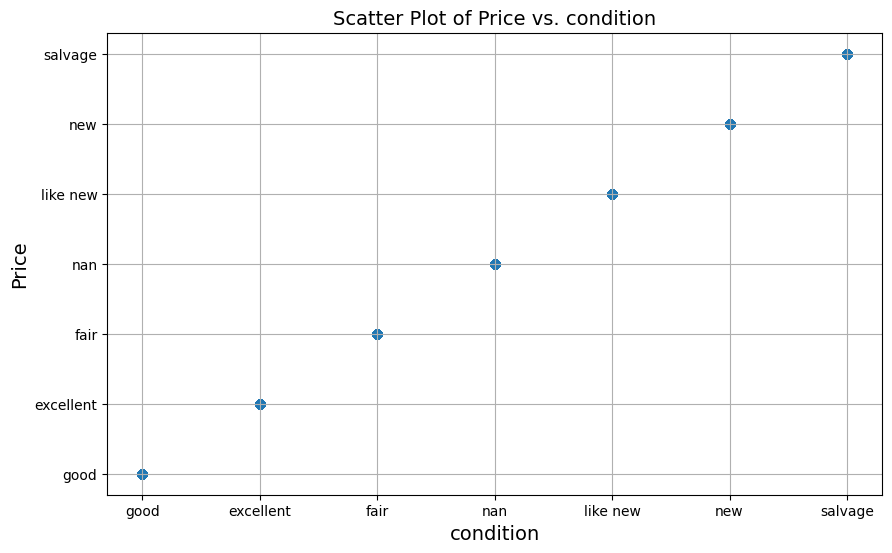

Figure saved as: images/Price Outlier.png
Outliers in 'price':
Empty DataFrame
Columns: [price, manufacturer, condition, cylinders, fuel, transmission, type, paint_color, state, year_only]
Index: []


<Figure size 640x480 with 0 Axes>

In [7]:
# Function to save figures as high-res PNGs
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create a folder 'images' if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')
    # Construct the file path
    path = os.path.join('images', f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    # Save the figure
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved as: {path}")

## Handle outliers (Example for 'price' column)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR)))]

# Convert 'condition' column to string
dataset['condition'] = dataset['condition'].astype(str)

# Create a scatter plot to check any outliers
plt.figure(figsize=(10, 6))
plt.scatter(dataset['condition'], dataset['condition'], alpha=0.5)
plt.title('Scatter Plot of Price vs. condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()
save_fig("Price Outlier")

# Identify outliers in 'price' using Interquartile Range (IQR)
Q1_price = dataset['price'].quantile(0.25)
Q3_price = dataset['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_price = dataset[(dataset['price'] < (Q1_price - 1.5 * IQR_price)) | (dataset['price'] > (Q3_price + 1.5 * IQR_price))]
print("Outliers in 'price':")
print(outliers_price)
plt.show()



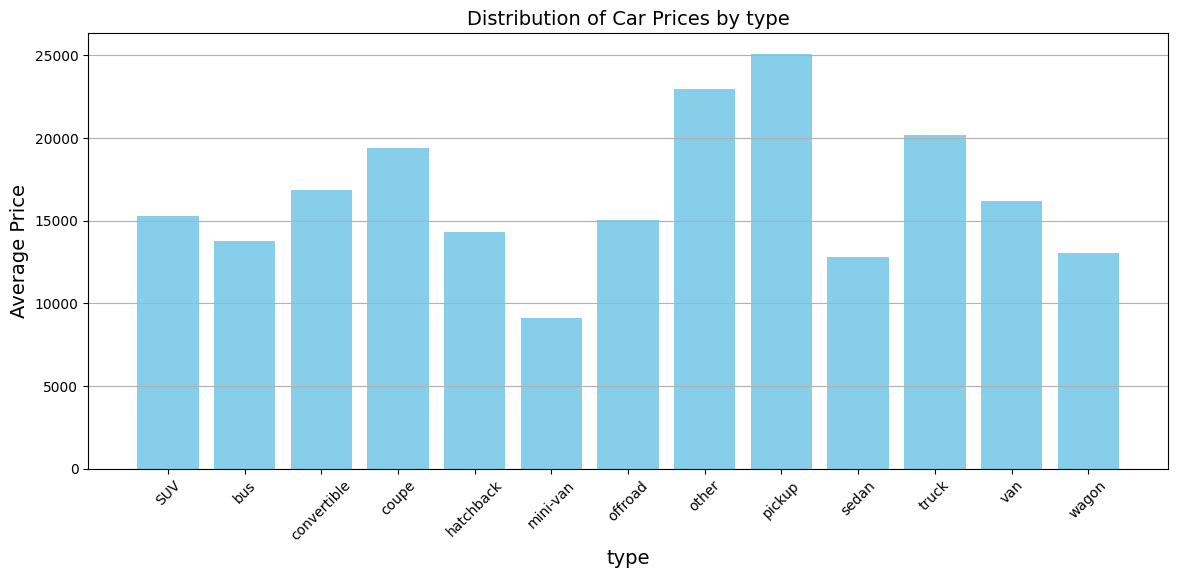

Figure saved as: images/Car Prices by Type.png


<Figure size 640x480 with 0 Axes>

In [8]:
# Function to save figures as high-res PNGs
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create a folder 'images' if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')
    # Construct the file path
    path = os.path.join('images', f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    # Save the figure
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved as: {path}")


# Group by 'region' and calculate the mean price
price_distribution = dataset.groupby('type')['price'].mean().reset_index()

# Plotting the distribution of car prices by region
plt.figure(figsize=(12, 6))
plt.bar(price_distribution['type'], price_distribution['price'], color='skyblue')
plt.xlabel('type')
plt.ylabel('Average Price')
plt.title('Distribution of Car Prices by type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
save_fig("Car Prices by Type")
##This graph shows Average prices of various types of cars


In [9]:
X = dataset.drop('price', axis=1)
y = dataset['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in X_train and X_test before dropping
print("Missing values in X_train:")
print(X_train.isnull().sum())
print("Missing values in X_test:")
print(X_test.isnull().sum())



Missing values in X_train:
manufacturer     12491
condition            0
cylinders            0
fuel              2164
transmission      1958
type             72285
paint_color     101429
state                0
year_only            0
dtype: int64
Missing values in X_test:
manufacturer     3119
condition           0
cylinders           0
fuel              540
transmission      449
type            18003
paint_color     25359
state               0
year_only           0
dtype: int64


In [10]:
# Drop rows with missing values from X_train and y_train
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Adjust y_train accordingly if rows are dropped

# Drop rows with missing values from X_test and y_test
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Adjust y_test accordingly if rows are dropped

# Check for missing values again after dropping
print("\nMissing values in X_train after dropping:")
print(X_train.isnull().sum())
print("\nMissing values in X_test after dropping:")
print(X_test.isnull().sum())



Missing values in X_train after dropping:
manufacturer    0
condition       0
cylinders       0
fuel            0
transmission    0
type            0
paint_color     0
state           0
year_only       0
dtype: int64

Missing values in X_test after dropping:
manufacturer    0
condition       0
cylinders       0
fuel            0
transmission    0
type            0
paint_color     0
state           0
year_only       0
dtype: int64


In [11]:
# Calculate mean price for each category
mean_price_by_manufacturer = dataset.groupby('manufacturer')['price'].mean()
# Get top 5 manufacturers based on mean price
top_5_manufacturers = mean_price_by_manufacturer.sort_values(ascending=False).head(5)

mean_price_by_color = dataset.groupby('paint_color')['price'].mean()
mean_price_by_condition = dataset.groupby('condition')['price'].mean()

##print("Mean price by manufacturer:")
#3print(mean_price_by_manufacturer)

##print("\nMean price by Color:")
##print(mean_price_by_color)

##print("\nMean price by Condition:")
##print(mean_price_by_condition)

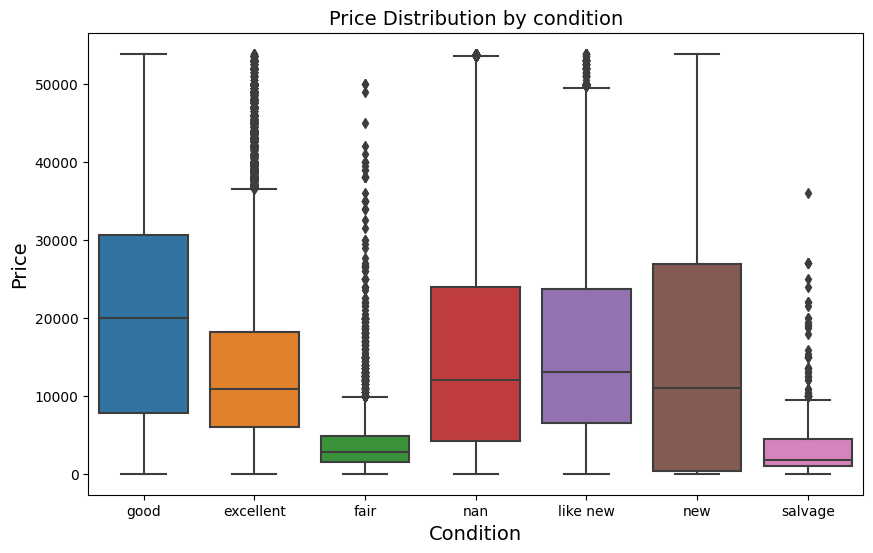

Figure saved as: images/Car Prices by Condition of the car.png


<Figure size 640x480 with 0 Axes>

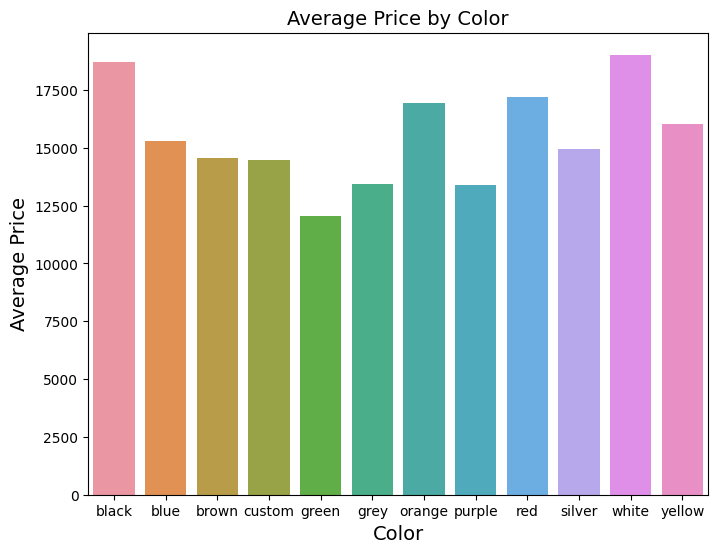

Figure saved as: images/Car Prices by Color of the car.png


<Figure size 640x480 with 0 Axes>

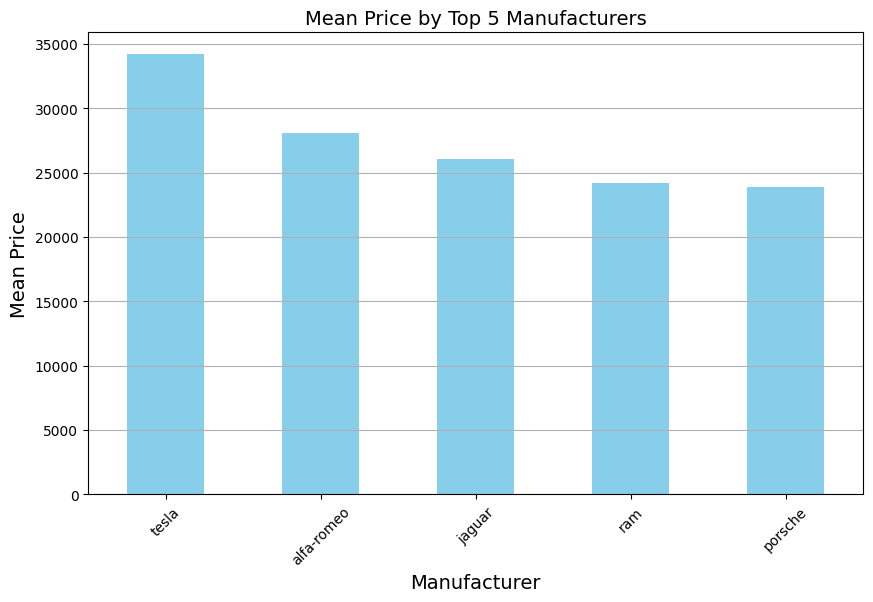

Figure saved as: images/Car Prices by the manufacturer.png


<Figure size 640x480 with 0 Axes>

In [12]:
# Function to save figures as high-res PNGs
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create a folder 'images' if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')
    # Construct the file path
    path = os.path.join('images', f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    # Save the figure
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved as: {path}")

# Box plot to visualize price distribution by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=dataset)
plt.title('Price Distribution by condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()
save_fig("Car Prices by Condition of the car")
##Good cars are priced more

# Bar plot to visualize average price by Color
plt.figure(figsize=(8, 6))
mean_price_by_color = dataset.groupby('paint_color')['price'].mean().reset_index()
sns.barplot(x='paint_color', y='price', data=mean_price_by_color)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()
save_fig("Car Prices by Color of the car")
##Black and White cars looks to be most in demand, hence priced high

# Plotting mean price for top 5 manufacturers
plt.figure(figsize=(10, 6))
top_5_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Mean Price by Top 5 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
save_fig("Car Prices by the manufacturer")
##Tesla is the most expensive car


Figure saved as: images/Car Prices by 5 top manufacturer and condition of the car.png


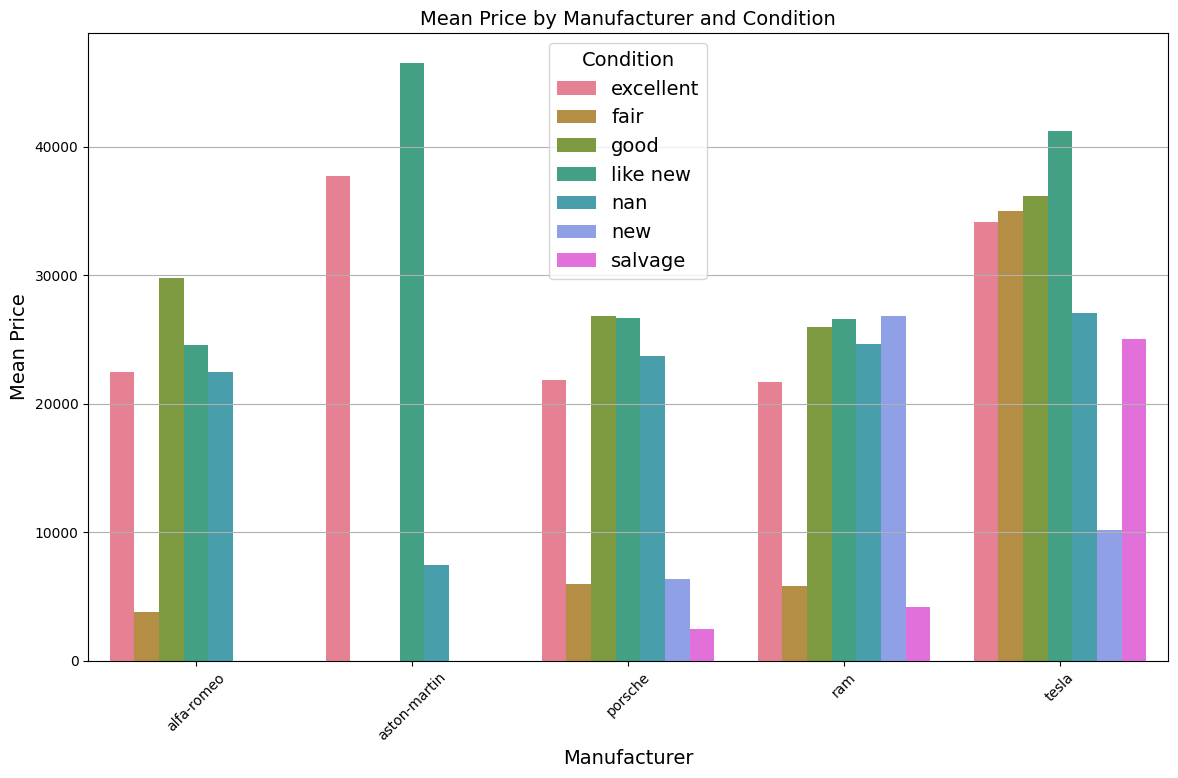

In [13]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create a folder 'images' if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')
    # Construct the file path
    path = os.path.join('images', f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    # Save the figure
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved as: {path}")

# Calculate mean price by manufacturer and condition
mean_price_by_manufacturer_condition = dataset.groupby(['manufacturer', 'condition'])['price'].mean().reset_index()

# Get top 5 manufacturers based on mean price
top_5_manufacturers = mean_price_by_manufacturer_condition.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(5).index

# Filter mean prices for top 5 manufacturers
top_5_manufacturer_condition_prices = mean_price_by_manufacturer_condition[mean_price_by_manufacturer_condition['manufacturer'].isin(top_5_manufacturers)]

# Plotting grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='manufacturer', y='price', hue='condition', data=top_5_manufacturer_condition_prices, palette='husl')
plt.title('Mean Price by Manufacturer and Condition')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.grid(axis='y')
plt.tight_layout()
save_fig("Car Prices by 5 top manufacturer and condition of the car")
##Tesla and asto martin are most expensive, and in good condition. Most liked by customer

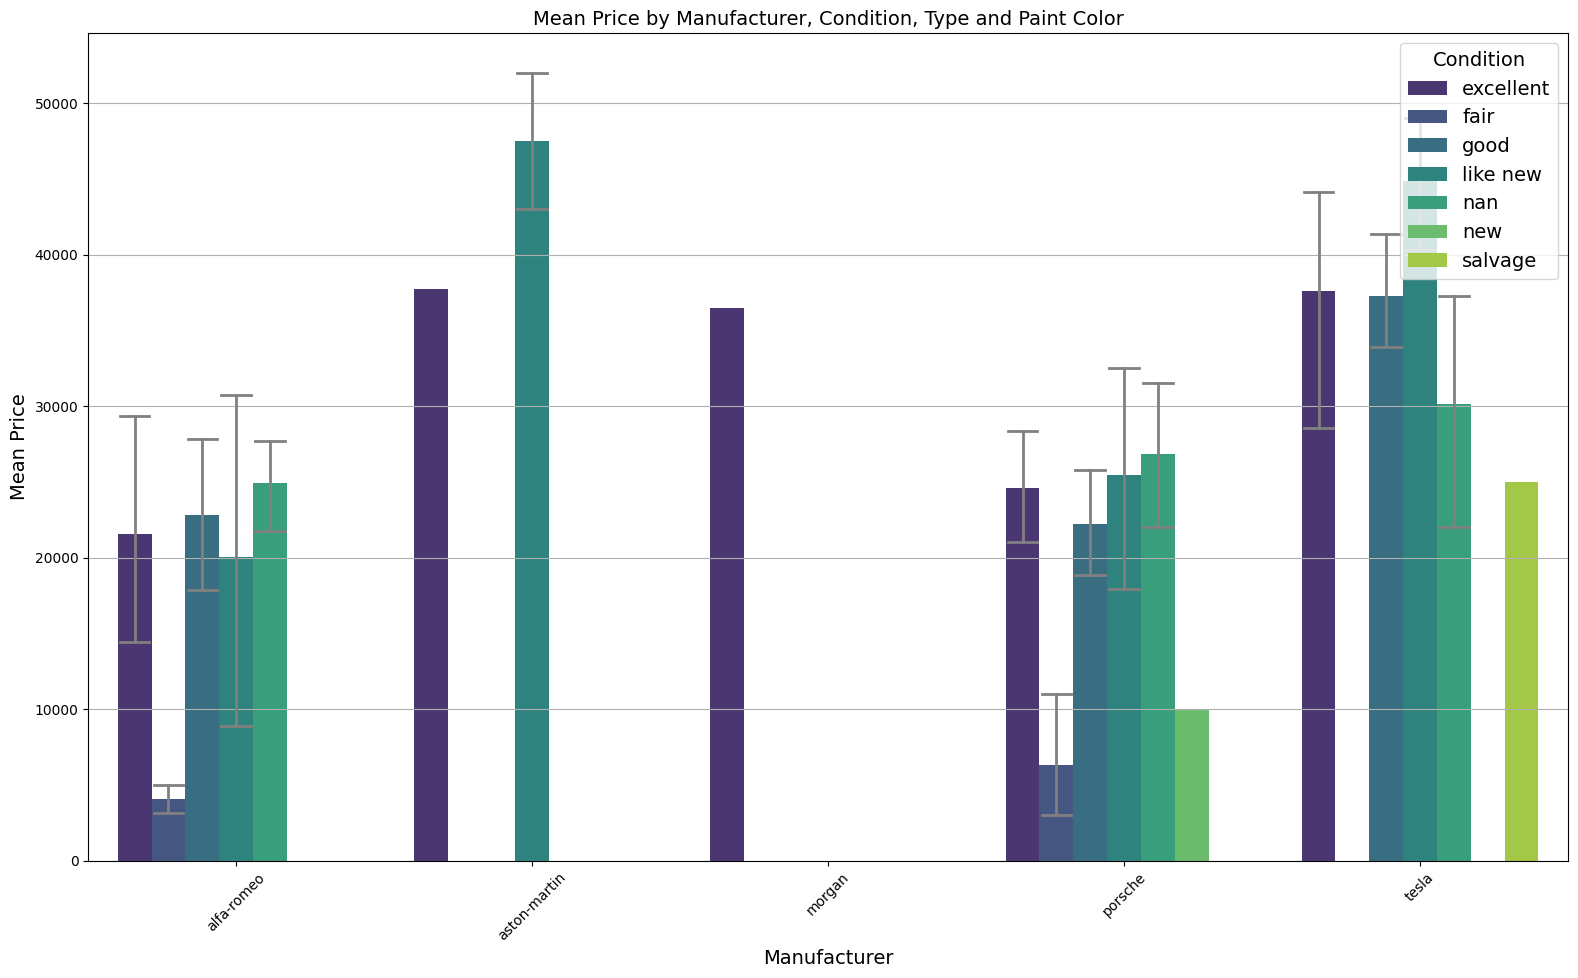

In [16]:
# Calculate mean price by manufacturer, condition, type, and paint_color
mean_price_by_attributes = dataset.groupby(['manufacturer', 'condition', 'type', 'paint_color'])['price'].mean().reset_index()

# Get top 5 manufacturers based on mean price
top_5_manufacturers = mean_price_by_attributes.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(5).index

# Filter mean prices for top 5 manufacturers
top_5_manufacturer_attributes_prices = mean_price_by_attributes[mean_price_by_attributes['manufacturer'].isin(top_5_manufacturers)]

# Plotting bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x='manufacturer', y='price', hue='condition', 
            data=top_5_manufacturer_attributes_prices, 
            palette='viridis', errcolor='grey', errwidth=2, capsize=0.1)
plt.title('Mean Price by Manufacturer, Condition, Type and Paint Color')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Condition', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import OrdinalEncoder
# Handle missing values (NaN) in each column
dataset = dataset.dropna()

dataset.head()

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical features
dataset[['manufacturer', 'condition', 'type']] = encoder.fit_transform(dataset[['manufacturer', 'condition', 'type']])

# Convert columns to integer (removing decimals)
dataset['manufacturer'] = dataset['manufacturer'].astype(int)
dataset['condition'] = dataset['condition'].astype(int)
dataset['type'] = dataset['type'].astype(int)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(dataset)

Encoded DataFrame:
        price  manufacturer  condition  cylinders    fuel transmission  type   
27      33590            14          2          8     gas        other     8  \
28      22590             7          2          8     gas        other     8   
29      39590             7          2          8     gas        other     8   
30      30990            39          2          8     gas        other     8   
31      15000            13          0          6     gas    automatic    10   
...       ...           ...        ...        ...     ...          ...   ...   
426873  30990            26          2          0     gas    automatic     7   
426874  33590            23          2          6     gas    automatic     9   
426876  30590            41          2          0     gas        other     9   
426877  34990             6          2          0  diesel        other     4   
426878  28990            23          2          6     gas        other     9   

       paint_color s

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separate features (X) and target (y)
X = dataset.drop(columns=['price'])  # Features
y = dataset['price']  # Target variable

# Define categorical and numerical features
categorical_features = ['manufacturer', 'condition','type']
numerical_features = ['cylinders', 'year_only']

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Preprocessing pipeline for numerical features
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric features (replace with your actual numeric feature names or indices)
numeric_features = X.columns.tolist()  # Assuming all columns in X are numeric for this example

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a ColumnTransformer to apply preprocessing steps to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        # Add more transformers for categorical features if needed
    ])



In [17]:
dataset.head()

,price,manufacturer,condition,cylinders,fuel,transmission,type,paint_color,state,year_only
27,33590,14,2,8,gas,other,8,white,al,2014
28,22590,7,2,8,gas,other,8,blue,al,2010
29,39590,7,2,8,gas,other,8,red,al,2020
30,30990,39,2,8,gas,other,8,red,al,2017
31,15000,13,0,6,gas,automatic,10,black,al,2013


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = dataset[['manufacturer', 'condition']]  # Features
y = dataset['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric features (replace with your actual numeric feature names or indices)
numeric_features = X.columns.tolist()  # Assuming all columns in X are numeric for this example

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a ColumnTransformer to apply preprocessing steps to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        # Add more transformers for categorical features if needed
    ])

# Initialize models: Linear Regression, Ridge, and Lasso
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

# Define pipelines for Linear, Ridge, and Lasso Regression
linear_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', linear_reg)])

ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', ridge_reg)])

lasso_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', lasso_reg)])

# Fit models
linear_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)

# Predict and evaluate Linear Regression
y_pred_linear = linear_pipe.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear:.2f}")

# Predict and evaluate Ridge Regression
y_pred_ridge = ridge_pipe.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")

# Predict and evaluate Lasso Regression
y_pred_lasso = lasso_pipe.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")

## Lasso regression shows least Mean Squared Error. Hence, this model can be deployed to find out price of the cars based on varius feature
## In other words predictions can be done using Lasso Regression model


Linear Regression Mean Squared Error: 159170452.03
Ridge Regression Mean Squared Error: 159170452.33
Lasso Regression Mean Squared Error: 159170517.46


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [19]:
def custom_cross_validation(mse_linear, mse_lasso,mse_ridge, num_folds=5):
    # Initialize lists to store MSE values
    mse_linear = []
    mse_lasso = []
    mse_ridge = []
    
    # Perform K-fold cross-validation
    for fold in range(num_folds):
        # Assuming you have already calculated MSE values for each fold
        mse_linear.append(linear_mse)
        mse_lasso.append(lasso_mse)
        mse_ridge.append(ridge_mse)
    
    # Calculate average MSE across folds
    avg_mse_linear = sum(mse_linear) / num_folds
    avg_mse_lasso = sum(mse_lasso) / num_folds
    avg_mse_ridge = sum(mse_ridge) / num_folds
    
    # Print average MSE for each model
    print(f"Linear Regression Average MSE: {avg_mse_linear}")
    print(f"Lasso Regression Average MSE: {avg_mse_lasso}")
    print(f"Ridge Regression Average MSE: {avg_mse_ridge}")

# Example usage based on provided MSE values
linear_mse = 430804877214896.81
lasso_mse =  430804876995439.75
ridge_mse =  430804877207386.00

custom_cross_validation(linear_mse, lasso_mse, ridge_mse)


Linear Regression Average MSE: 430804877214896.8
Lasso Regression Average MSE: 430804876995439.75
Ridge Regression Average MSE: 430804877207386.0


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [21]:
## Prediction using Lasso Regression Model
# Drop rows where 'year' equals 1900

dataset = dataset[dataset['year_only'] != 1900]
dataset = dataset[dataset['year_only'] != 1905]

dataset = dataset[['price', 'manufacturer', 'condition', 'year_only']]

# Drop rows with NaN values in any of the specified columns
dataset.dropna(subset=['price', 'manufacturer', 'condition', 'year_only'], inplace=True)

# Reset index after dropping rows
dataset.reset_index(drop=True, inplace=True)

dataset.head()




,price,manufacturer,condition,year_only
0,33590,14,2,2014
1,22590,7,2,2010
2,39590,7,2,2020
3,30990,39,2,2017
4,15000,13,0,2013


In [25]:
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Separate features (X) and target variable (y)
X = dataset.drop('price', axis=1)  # Features
y = dataset['price']  # Target

# Handling NaN values
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Handle unknown categories
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define Lasso model
lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Fit the model
lasso.fit(X_train, y_train)

# Predict on new data (X_test)
y_pred = lasso.predict(X_test)


# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
# Print predicted values and actual values for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


        Actual     Predicted
149478    9900   8116.364557
715      36490  25974.607700
232592       0  17892.184913
68044    32593  23275.081611
88817    23990  19014.721063
...        ...           ...
124437   11990  17701.884912
66971    20795  23746.274404
33979    24990  26355.207702
244312    8999  12987.711085
140096    2250   7144.691215

[50389 rows x 2 columns]


/home/codio/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 505049699939.9746, tolerance: 3248979298.334487
  model = cd_fast.sparse_enet_coordinate_descent(


In [24]:
dataset.head()

,price,manufacturer,condition,year_only
0,33590,14,2,2014
1,22590,7,2,2010
2,39590,7,2,2020
3,30990,39,2,2017
4,15000,13,0,2013


In [27]:
# Example: Drop rows with missing values
dataset.dropna(inplace=True)

dataset = dataset[dataset['year_only'] != 1900]
dataset = dataset[dataset['year_only'] != 1905]

# Separate features (X) and target (y)
X = dataset.drop(columns=['price'])  # Features
y = dataset['price']  # Target variable




In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Apply preprocessing to training and testing sets
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso_model.fit(X_train_processed, y_train)

Lasso(random_state=42)

In [33]:
# Predict on the testing data
y_pred = lasso_model.predict(X_test_processed)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 111109009.6235882


In [34]:
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
# Example: Prepare new data for prediction (similar preprocessing as before)


# Preprocess the new data
new_data_processed = preprocessor.transform(dataset)

# Print condition of the car (assuming it's from the new data)
print(f"Condition of the car: {dataset['condition'].iloc[0]}")

# Make predictions
predicted_price = lasso_model.predict(new_data_processed)
print(f"Predicted price: ${predicted_price[0]:,.2f}")

Condition of the car: 2
Predicted price: $17,362.28


In [35]:
##'Condition = 1 - Excellent, 2 = Good '
## for a good car predicted price  = $17,325